In [27]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-15 02:25:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.166.240, 172.217.27.176, 216.58.196.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   240KB/s    in 4m 42s  

2020-09-15 02:30:00 (238 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [28]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [29]:
# Defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# compile model

model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics = ['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,    # 2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,    # 1000 images = batch_size * steps
    verbose= 2    # for seeing the training progress
)


Epoch 1/100
Epoch 1/100
100/100 - 7s - loss: 0.6906 - acc: 0.5295 - val_loss: 0.6723 - val_acc: 0.6050
Epoch 2/100
Epoch 1/100
100/100 - 7s - loss: 0.6553 - acc: 0.6125 - val_loss: 0.6474 - val_acc: 0.6180
Epoch 3/100
Epoch 1/100
100/100 - 7s - loss: 0.6048 - acc: 0.6765 - val_loss: 0.5886 - val_acc: 0.6960
Epoch 4/100
Epoch 1/100
100/100 - 7s - loss: 0.5558 - acc: 0.7130 - val_loss: 0.5779 - val_acc: 0.6930
Epoch 5/100
Epoch 1/100
100/100 - 6s - loss: 0.5294 - acc: 0.7335 - val_loss: 0.5562 - val_acc: 0.7200
Epoch 6/100
Epoch 1/100
100/100 - 7s - loss: 0.4956 - acc: 0.7560 - val_loss: 0.5706 - val_acc: 0.7010
Epoch 7/100
Epoch 1/100
100/100 - 6s - loss: 0.4689 - acc: 0.7790 - val_loss: 0.5570 - val_acc: 0.7230
Epoch 8/100
Epoch 1/100
100/100 - 7s - loss: 0.4428 - acc: 0.7945 - val_loss: 0.5548 - val_acc: 0.7180
Epoch 9/100
Epoch 1/100
100/100 - 7s - loss: 0.4198 - acc: 0.8105 - val_loss: 0.5682 - val_acc: 0.7120
Epoch 10/100
Epoch 1/100
100/100 - 7s - loss: 0.4009 - acc: 0.8190 - val_

In [32]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


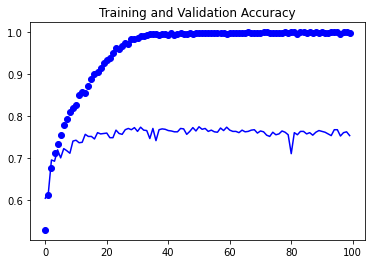

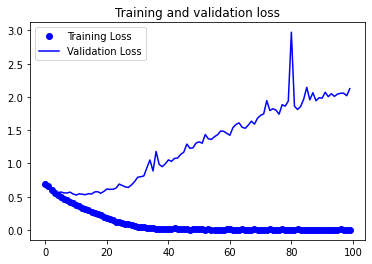

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Lets see the impact of DATA AUGMENTATION

In [34]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-15 02:40:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.160.240, 172.217.161.16, 172.217.167.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.160.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   241KB/s    in 4m 41s  

2020-09-15 02:45:41 (238 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [35]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [36]:
# Defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# compile model

model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics = ['accuracy'])



In [37]:
## Data augmentation

train_datagem = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)


In [38]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = 100,    # 2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,    # 1000 images = batch_size * steps
    verbose= 2    # for seeing the training progress
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
Epoch 1/100
100/100 - 7s - loss: 0.6905 - acc: 0.5275 - val_loss: 0.6690 - val_acc: 0.6040
Epoch 2/100
Epoch 1/100
100/100 - 7s - loss: 0.6620 - acc: 0.5990 - val_loss: 0.6418 - val_acc: 0.6550
Epoch 3/100
Epoch 1/100
100/100 - 7s - loss: 0.6186 - acc: 0.6595 - val_loss: 0.6146 - val_acc: 0.6800
Epoch 4/100
Epoch 1/100
100/100 - 7s - loss: 0.5726 - acc: 0.7015 - val_loss: 0.5883 - val_acc: 0.6930
Epoch 5/100
Epoch 1/100
100/100 - 7s - loss: 0.5333 - acc: 0.7290 - val_loss: 0.5587 - val_acc: 0.7190
Epoch 6/100
Epoch 1/100
100/100 - 7s - loss: 0.5027 - acc: 0.7570 - val_loss: 0.5727 - val_acc: 0.7000
Epoch 7/100
Epoch 1/100
100/100 - 7s - loss: 0.4761 - acc: 0.7685 - val_loss: 0.5511 - val_acc: 0.7300
Epoch 8/100
Epoch 1/100
100/100 - 6s - loss: 0.4543 - acc: 0.7850 - val_loss: 0.5432 - val_acc: 0.7310
Epoch 9/100
Epoch 1/100
100/100 - 6s - loss: 0.4200 - acc: 0.8055 - val_loss: 0.5192 - val_a

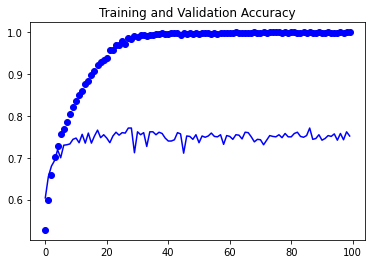

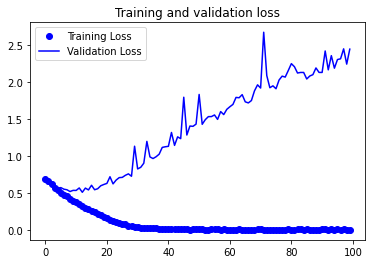

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## This is to study the imapact of Data Augmentation... 